# **Transcriptional mediators of treatment resistance in lethal prostate cancer**
*Nature Medicine* volume 27, pages 426–433 (2021) [PMID: 33664492](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/)



**Abstract**

Metastatic castration-resistant prostate cancer is typically lethal, exhibiting intrinsic or acquired resistance to second-generation androgen-targeting therapies and minimal response to immune checkpoint inhibitors1. Cellular programs driving resistance in both cancer and immune cells remain poorly understood. We present single-cell transcriptomes from 14 patients with advanced prostate cancer, spanning all common metastatic sites. Irrespective of treatment exposure, adenocarcinoma cells pervasively coexpressed multiple androgen receptor isoforms, including truncated isoforms hypothesized to mediate resistance to androgen-targeting therapies2,3. Resistance to enzalutamide was associated with cancer cell–intrinsic epithelial–mesenchymal transition and transforming growth factor-β signaling. Small cell carcinoma cells exhibited divergent expression programs driven by transcriptional regulators promoting lineage plasticity and HOXB5, HOXB6 and NR1D2 (refs. 4,5,6). Additionally, a subset of patients had high expression of dysfunction markers on cytotoxic CD8+ T cells undergoing clonal expansion following enzalutamide treatment. Collectively, the transcriptional characterization of cancer and immune cells from human metastatic castration-resistant prostate cancer provides a basis for the development of therapeutic approaches complementing androgen signaling inhibition.

![picture](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41591-021-01244-6/MediaObjects/41591_2021_1244_Fig4_HTML.png?as=webp)
**Fig. 4: Cytotoxic lymphocyte populations and clonal expansions in metastatic niches.**

**a**, Subclustering of NK and T cells. Each dot represents a single cell projected onto uniform manifold approximation and projection (UMAP) space colored corresponding to clustering via the Louvain algorithm. Clusters are manually labeled with dominant phenotype/cell type from patterns of marker gene expression. Cluster colors are used throughout subpanels. **b**, Expression of select marker, effector and co-inhibitory receptor genes within cytotoxic clusters, CD16+ NK (n = 30), CD8+GNLY+ (n = 84), CD8+CXCR4+ (n = 157) and CD8+PD-1+ (n = 106). Nominal P values from a two-sided Mann–Whitney U-test are shown. TPM, transcripts per million. **c**, T cell clonotypes from scRNA-seq TCR reconstruction. Each bar represents cells sharing a reconstructed productive TCR CDR3 sequence. Bars are grouped by patient. SCC, small cell carcinoma. **d**, Changes in clonal fractions of cytotoxic T cell clonotypes in patient 01115655 following enzalutamide treatment. Each subplot corresponds to a single clonotype with TCRα and β CDR3 amino acid sequences paired from scRNA-seq. Clonal fractions for the same CDR3 sequences (matching at both nucleotide and amino acid level) inferred from TCR reconstruction in bulk RNA-seq are plotted. All detected single cells of the displayed clonotypes came from the CD8+PD-1+ T cell cluster. **e**, PDCD1 to CD8A expression ratio in bulk RNA-seq of paired biopsies from the same patient before and after enzalutamide treatment. Paired biopsies did not always derive from the same site; color of dots indicate biopsy site types. For patient 01115462, the pre-enzalutamide biopsy was collected from the sacrum and the post-enzalutamide biopsy was collected from a left ischial lesion. **f**, Expanded T cell clonotypes following enzalutamide in patients 01115462 and 01115467. Each dot represents a single CDR3 sequence detected in bulk RNA-seq. CDR3 sequences identified both before and after enzalutamide are connected by a broken gray line.



In [85]:
#imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


## <strong>Data Import</strong>
The supplementary data of this publication is available at the Broad Institute’s Single Cell Portal (“[SCP](https://singlecell.broadinstitute.org/single_cell)”). For this bootcamp, I have uploaded the data in our GitHub repository so that you don't need to create an SCP account. However, I encourage you to explore this resource by your own because it contains lots of interesting data that you can use for your projects and the user interface is very intuitive and allows you to perform some exploratory visualizations.

<br>

Let's have a look at the entry for this project: [SCP1244](https://singlecell.broadinstitute.org/single_cell/study/SCP1244/transcriptional-mediators-of-treatment-resistance-in-lethal-prostate-cancer)




In [40]:
# import workshop data directly from a URL:
df_all = pd.read_csv('https://raw.githubusercontent.com/MMRES-PyBootcamp/MMRES-python-bootcamp2021/master/prostate_cancer_data/scp_clustering.tsv',sep='\t',index_col=0,skiprows=[1])
df_nkt = pd.read_csv('https://raw.githubusercontent.com/MMRES-PyBootcamp/MMRES-python-bootcamp2021/master/prostate_cancer_data/scp_nk_t_clustering.tsv',sep='\t',index_col=0,skiprows=[1])
df_metadata = pd.read_csv('https://raw.githubusercontent.com/MMRES-PyBootcamp/MMRES-python-bootcamp2021/master/prostate_cancer_data/scp_metadata.tsv',sep='\t',index_col=0,skiprows=[1])

In [31]:
# download, uncompress and import workshop data
os.getcwd()
os.mkdir('./assets/')
!wget --quiet -O -  https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2021/raw/master/prostate_cancer_data/scp_tpm.tsv.gz | gunzip > ./assets/scp_tpm.tsv
df_exp=pd.read_csv('./assets/scp_tpm.tsv',sep='\t',index_col=0).T
df_exp.index=df_exp.index.astype(np.int)

## <strong>Whole Dataset</strong>


In [57]:
df=df_exp.merge(df_all,right_index=True,left_index=True,how='inner')


,CD3G,cluster dominant cell type
0,0.0000,prostate cancer cell
1,0.0000,plasmablast
2,0.0000,prostate cancer cell
3,0.0000,prostate cancer cell
4,491.3416,CD4+ T cell
...,...,...
2165,0.0000,erythroid cell
2166,0.0000,erythroid cell
2167,0.0000,erythroid cell
2168,0.0000,erythroid cell


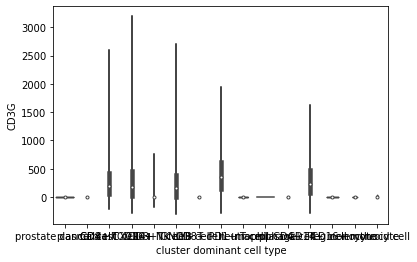

In [59]:

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplotplot(data=df,x='cluster dominant cell type',y='CD3G')
ax.set_xticklabels()

In [86]:
# let's order the cell types according to the expression of this marker gene
s_celltypes=sorted([(col,val['CD3G'].mean()) for col,val in df.groupby('cluster dominant cell type')], key=lambda x: x[1],reverse=True)
s_celltypes


[('CD8+ PD1+ T cell', 428.0224452830189),
 ('CD4+ Treg cell', 308.0219846153846),
 ('CD8+ CXCR4+ T cell', 305.3623286624203),
 ('CD4+ T cell', 291.6752452887541),
 ('CD8+ GNLY+ T cell', 260.4716333333334),
 ('CD16+ NK cell', 80.27113333333334),
 ('erythroid cell', 0.2293435185185185),
 ('B cell', 0.058209574468085105),
 ('plasmablast', 0.045248648648648644),
 ('plasma cell', 0.04522045454545454),
 ('CD16+ monocyte', 0.01687),
 ('neutrophil', 0.0076484375),
 ('CD14+ monocyte', 0.006063076923076923),
 ('prostate cancer cell', 0.0018120813397129185),
 ('macrophage', 0.0)]

[Text(0, 0, 'CD8+ PD1+ T cell'),
 Text(0, 0, 'CD4+ Treg cell'),
 Text(0, 0, 'CD8+ CXCR4+ T cell'),
 Text(0, 0, 'CD4+ T cell'),
 Text(0, 0, 'CD8+ GNLY+ T cell'),
 Text(0, 0, 'CD16+ NK cell'),
 Text(0, 0, 'erythroid cell'),
 Text(0, 0, 'B cell'),
 Text(0, 0, 'plasmablast'),
 Text(0, 0, 'plasma cell'),
 Text(0, 0, 'CD16+ monocyte'),
 Text(0, 0, 'neutrophil'),
 Text(0, 0, 'CD14+ monocyte'),
 Text(0, 0, 'prostate cancer cell'),
 Text(0, 0, 'macrophage')]

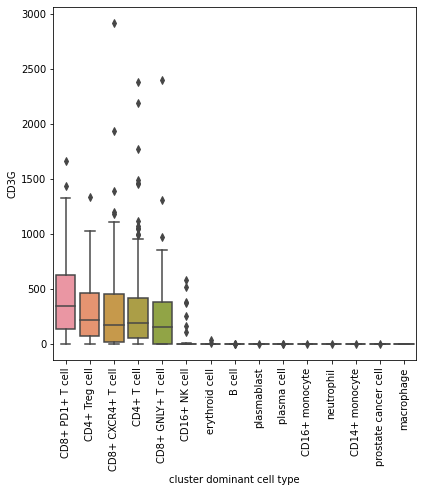

In [88]:

ordered_cells=np.array(s_celltypes).T[0]

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(data=df,x='cluster dominant cell type',y='CD3G',order=ordered_cells)
ax.set_xticklabels(ordered_cells,rotation=90)

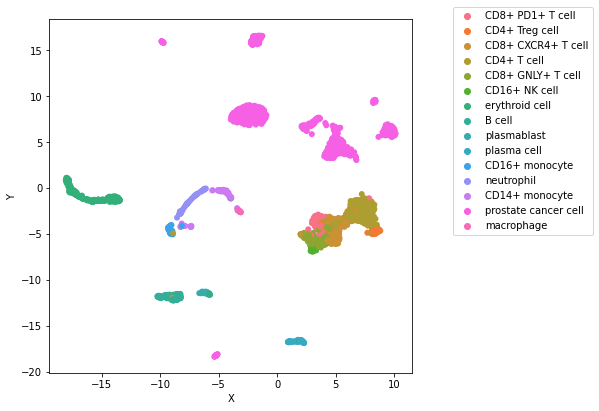

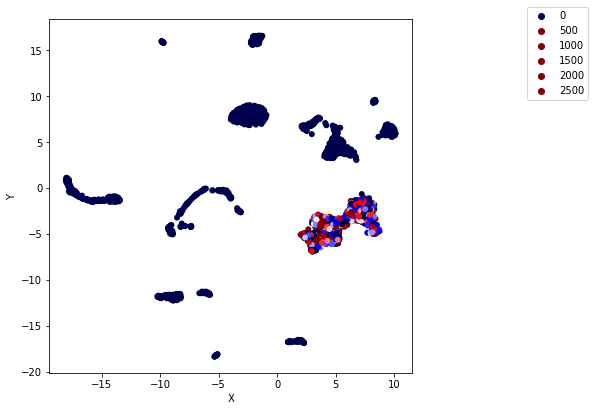

In [102]:
f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="X", y="Y",
                hue="cluster dominant cell type",
                hue_order=ordered_cells,
                linewidth=0,
                data=df, ax=ax)

ax.legend(bbox_to_anchor=(1.1, 1.05))

f, ax = plt.subplots(figsize=(6.5, 6.5))

sns.scatterplot(x="X", y="Y",
                hue="CD3G",
                palette=plt.cm.seismic,hue_norm=(0,500),hue_order="CD3G",
                linewidth=0,
                data=df, ax=ax)

ax.legend(bbox_to_anchor=(1.5, 1.05))

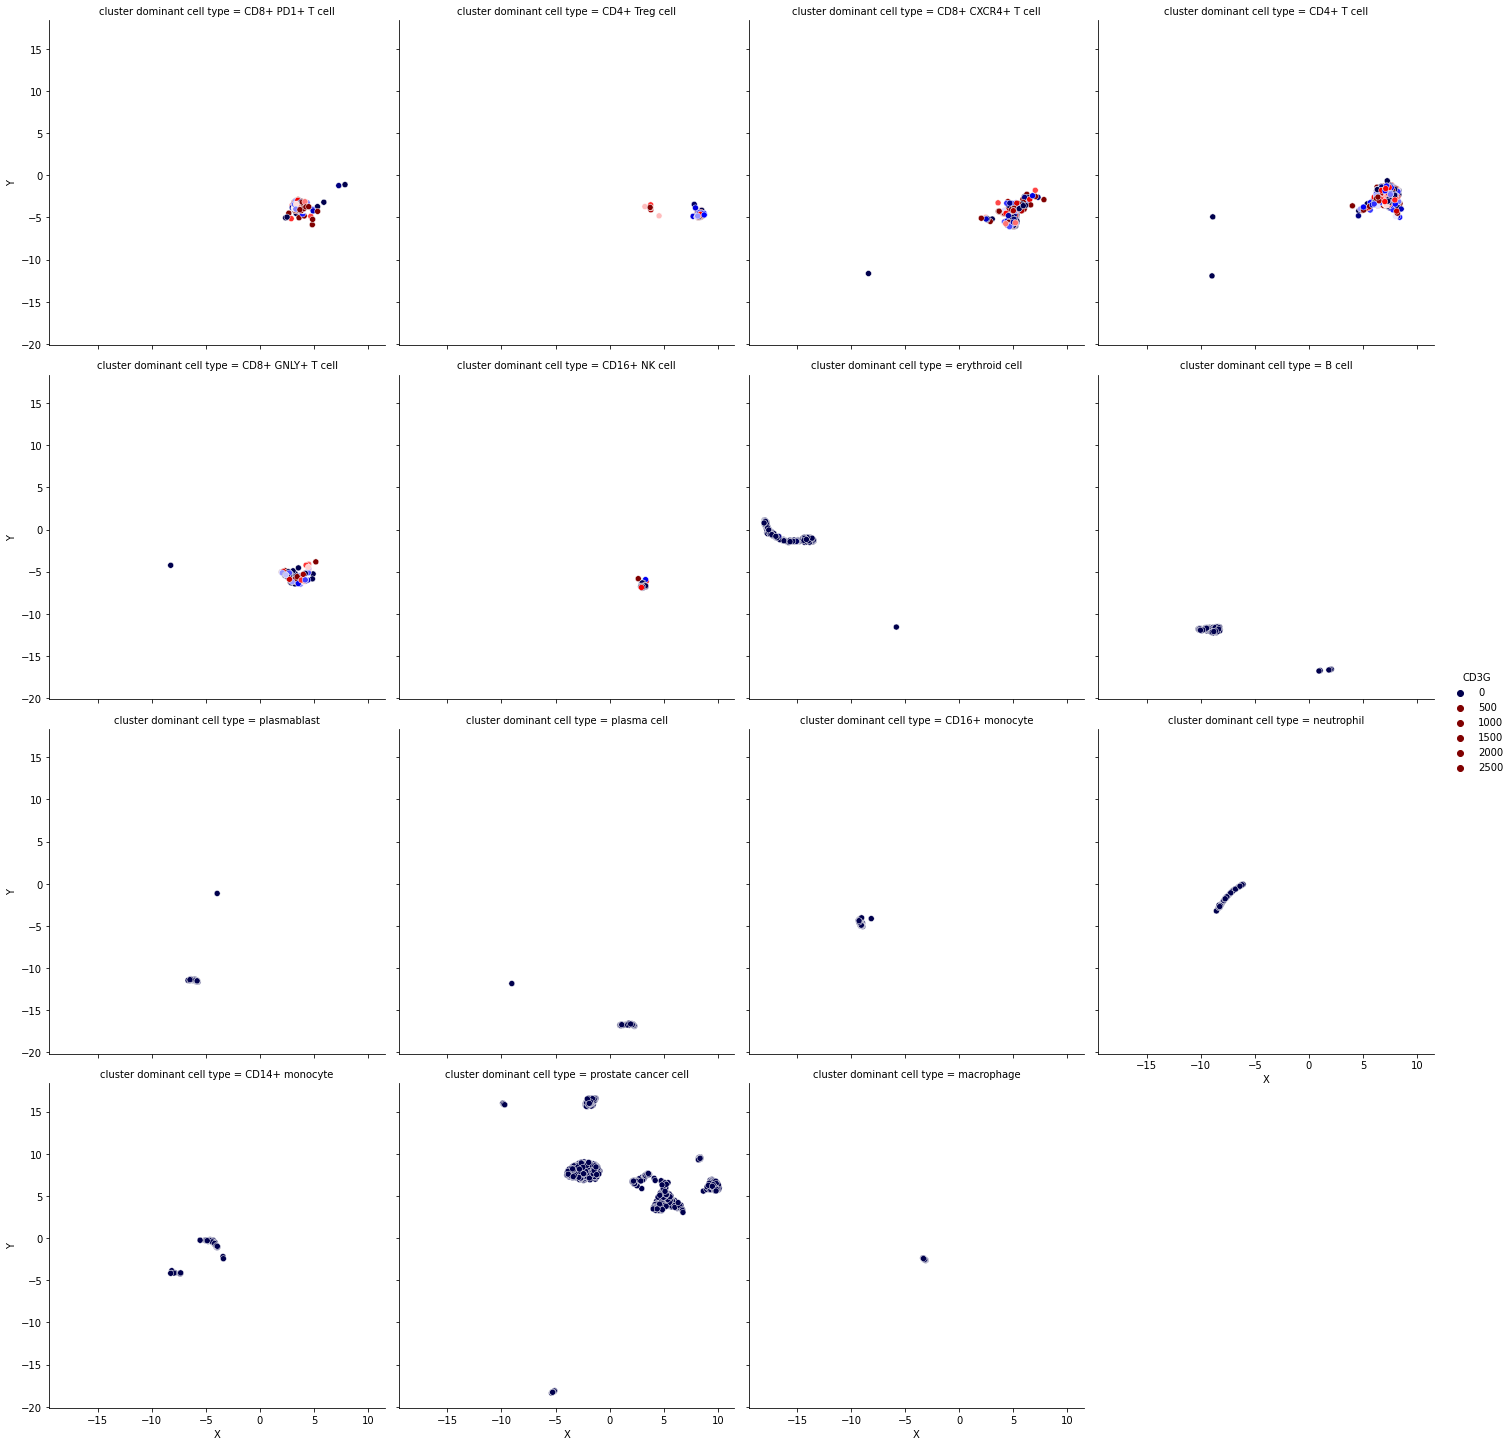

In [101]:
sns.relplot(
    data=df, x="X", y="Y",
    col="cluster dominant cell type", hue="CD3G", 
    col_wrap=4, palette=plt.cm.seismic,hue_norm=(0,500), col_order=ordered_cells,
    kind="scatter"
)

## <strong>Cytotoxic lymphocyte populations</strong>


In [103]:
df=df_exp.merge(df_nkt,right_index=True,left_index=True,how='inner')

In [123]:
color_dict={
    'CD8+ PD1+ T cell':'#2a9a79', 
    'CD8+ CXCR4+ T cell':'#7eb459', 
    'CD8+ GNLY+ T cell':'#486aa5',
    'CD16+ NK cell':'#7e3689', 
    'CD4+ Treg cell':'#ec9034', 
    'CD4+ T cell':'#fd7971'
}

[Text(0, 0, 'CD8+ PD1+ T cell'),
 Text(0, 0, 'CD4+ Treg cell'),
 Text(0, 0, 'CD8+ CXCR4+ T cell'),
 Text(0, 0, 'CD4+ T cell'),
 Text(0, 0, 'CD8+ GNLY+ T cell'),
 Text(0, 0, 'CD16+ NK cell')]

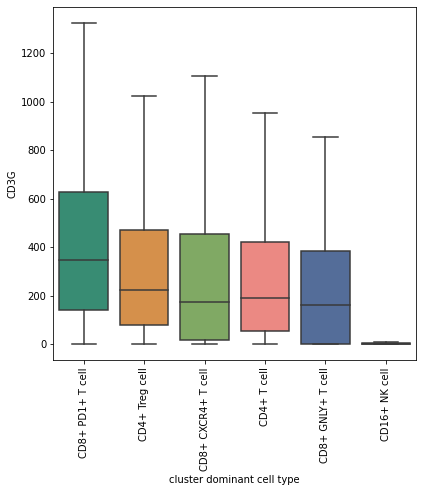

In [125]:
# let's order the cell types according to the expression of CD3 marker gene
s_celltypes=sorted([(col,val['CD3G'].mean()) for col,val in df.groupby('cluster dominant cell type')], key=lambda x: x[1],reverse=True)
ordered_cells=np.array(s_celltypes).T[0]
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(data=df,x='cluster dominant cell type',y='CD3G',order=ordered_cells, showfliers = False,palette=color_dict)
ax.set_xticklabels(ordered_cells,rotation=90)


[Text(0, 0, 'CD4+ Treg cell'),
 Text(0, 0, 'CD4+ T cell'),
 Text(0, 0, 'CD8+ PD1+ T cell'),
 Text(0, 0, 'CD8+ GNLY+ T cell'),
 Text(0, 0, 'CD8+ CXCR4+ T cell'),
 Text(0, 0, 'CD16+ NK cell')]

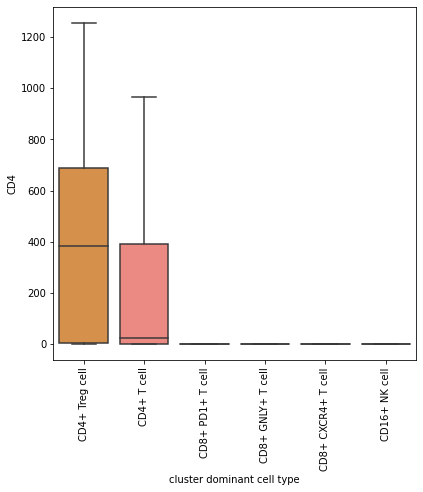

In [126]:
# let's order the cell types according to the expression of CD4 marker gene
s_celltypes=sorted([(col,val['CD4'].mean()) for col,val in df.groupby('cluster dominant cell type')], key=lambda x: x[1],reverse=True)
ordered_cells=np.array(s_celltypes).T[0]
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(data=df,x='cluster dominant cell type',y='CD4',order=ordered_cells, showfliers = False,palette=color_dict)
ax.set_xticklabels(ordered_cells,rotation=90)


[Text(0, 0, 'CD16+ NK cell'),
 Text(0, 0, 'CD8+ GNLY+ T cell'),
 Text(0, 0, 'CD8+ CXCR4+ T cell'),
 Text(0, 0, 'CD4+ T cell'),
 Text(0, 0, 'CD8+ PD1+ T cell'),
 Text(0, 0, 'CD4+ Treg cell')]

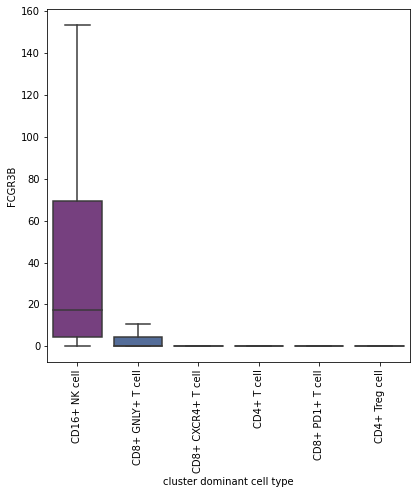

In [127]:
# let's order the cell types according to the expression of CD16 (FCGR3B) marker gene
s_celltypes=sorted([(col,val['FCGR3B'].mean()) for col,val in df.groupby('cluster dominant cell type')], key=lambda x: x[1],reverse=True)
ordered_cells=np.array(s_celltypes).T[0]
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(data=df,x='cluster dominant cell type',y='FCGR3B',order=ordered_cells, showfliers = False,palette=color_dict)
ax.set_xticklabels(ordered_cells,rotation=90)

[Text(0, 0, 'CD8+ PD1+ T cell'),
 Text(0, 0, 'CD8+ CXCR4+ T cell'),
 Text(0, 0, 'CD8+ GNLY+ T cell'),
 Text(0, 0, 'CD16+ NK cell'),
 Text(0, 0, 'CD4+ Treg cell'),
 Text(0, 0, 'CD4+ T cell')]

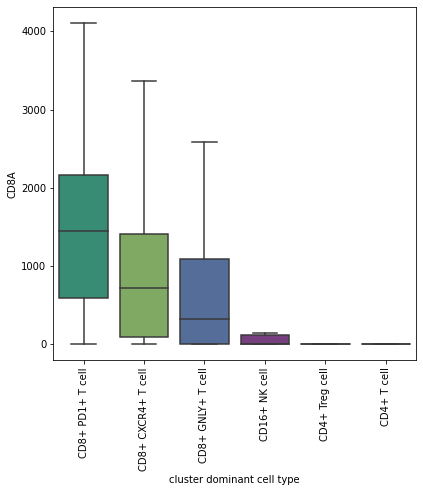

In [124]:
# let's order the cell types according to the expression of CD8 marker gene
s_celltypes=sorted([(col,val['CD8A'].mean()) for col,val in df.groupby('cluster dominant cell type')], key=lambda x: x[1],reverse=True)
ordered_cells=np.array(s_celltypes).T[0]
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(data=df,x='cluster dominant cell type',y='CD8A',order=ordered_cells, showfliers = False,palette=color_dict)
ax.set_xticklabels(ordered_cells,rotation=90)


[Text(0, 0, 'CD16+ NK cell'),
 Text(0, 0, 'CD8+ GNLY+ T cell'),
 Text(0, 0, 'CD8+ CXCR4+ T cell'),
 Text(0, 0, 'CD8+ PD1+ T cell')]

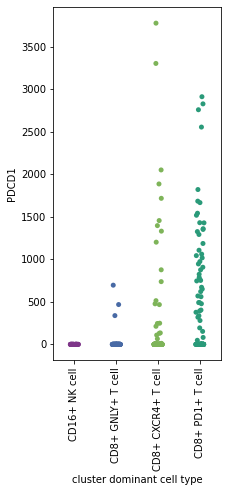

In [133]:
ordered_cells=['CD16+ NK cell', 'CD8+ GNLY+ T cell', 'CD8+ CXCR4+ T cell','CD8+ PD1+ T cell']
f, ax = plt.subplots(figsize=(3, 6.5))
sns.stripplot(data=df,x='cluster dominant cell type',y='PDCD1',order=ordered_cells, palette=color_dict)
ax.set_xticklabels(ordered_cells,rotation=90)


[Text(0, 0, 'CD16+ NK cell'),
 Text(0, 0, 'CD8+ GNLY+ T cell'),
 Text(0, 0, 'CD8+ CXCR4+ T cell'),
 Text(0, 0, 'CD8+ PD1+ T cell')]

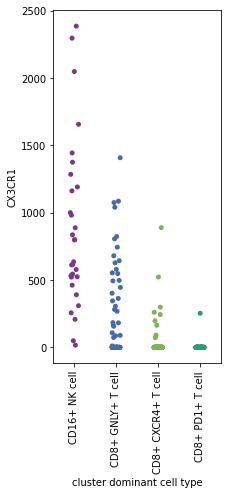

In [132]:
ordered_cells=['CD16+ NK cell', 'CD8+ GNLY+ T cell', 'CD8+ CXCR4+ T cell','CD8+ PD1+ T cell']
f, ax = plt.subplots(figsize=(3, 6.5))
sns.stripplot(data=df,x='cluster dominant cell type',y='CX3CR1',order=ordered_cells, palette=color_dict)
ax.set_xticklabels(ordered_cells,rotation=90)

## <strong>Heatmaps</strong>


In [154]:
markers=['CD4','CD8A','CD3G','FCGR3B','PDCD1','HAVCR2','TOX','CX3CR1','CXCR4','GZMB']

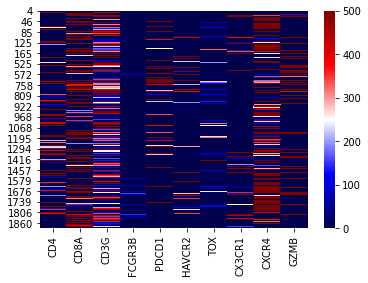

In [159]:
sns.heatmap(df[markers],cmap=plt.cm.seismic,vmin=0,vmax=500)

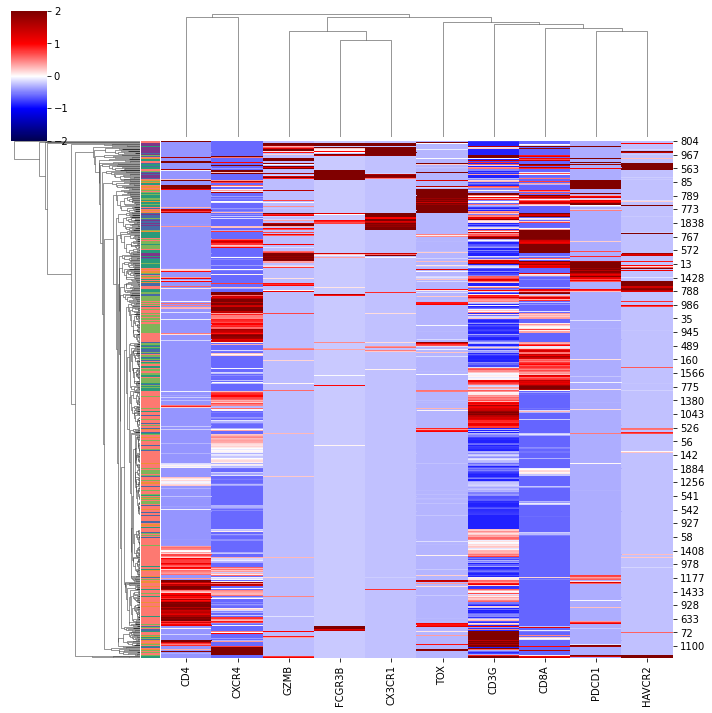

In [164]:
clusters=df['cluster dominant cell type']
row_colors = clusters.map(color_dict)
sns.clustermap(df[markers].apply(lambda x:zscore(x),axis=0),cmap=plt.cm.seismic,vmin=-2,vmax=2,row_colors=row_colors.to_numpy())


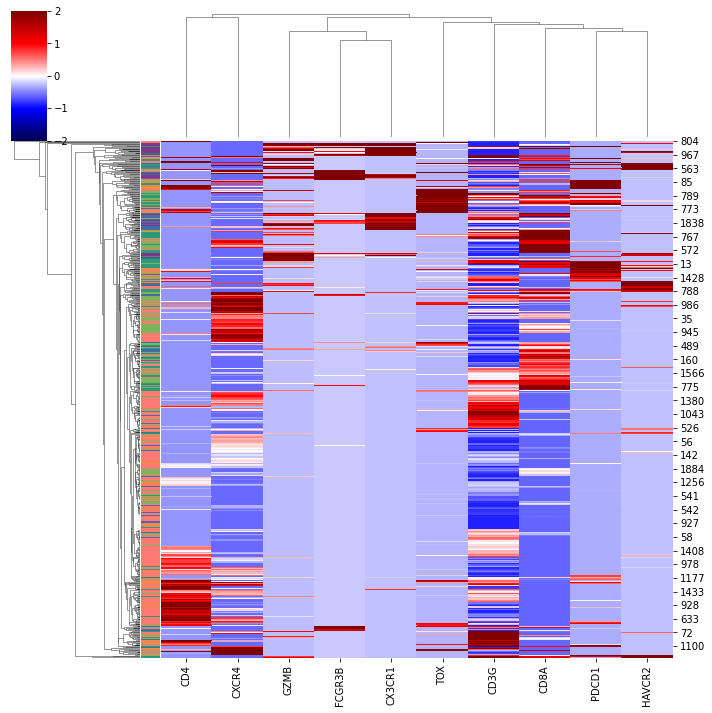

In [165]:
sns.clustermap(df[markers],z_score=1,cmap=plt.cm.seismic,vmin=-2,vmax=2,row_colors=row_colors.to_numpy())


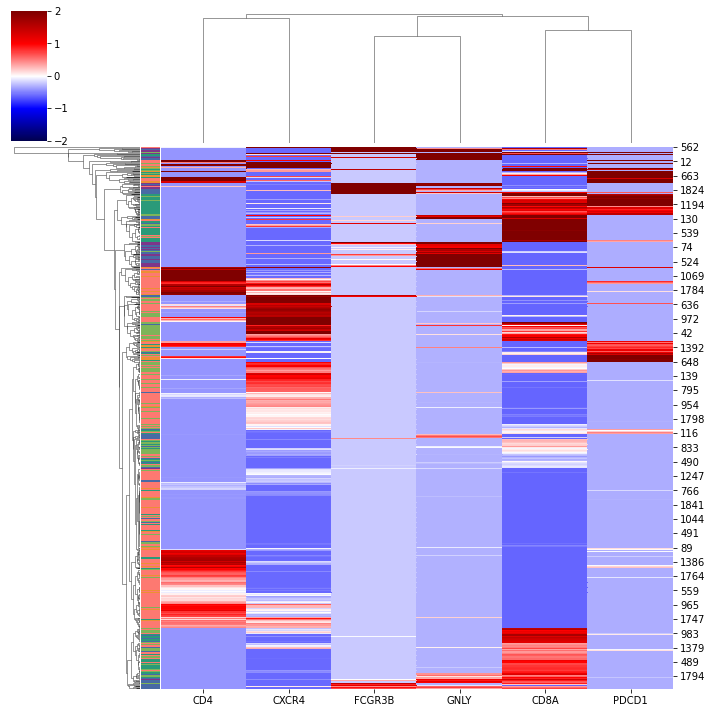

In [171]:
markers=['CD4','CD8A','FCGR3B','PDCD1','CXCR4','GNLY']
#markers=['CD4','CD8A','FCGR3B']
sns.clustermap(df[markers],z_score=1,cmap=plt.cm.seismic,vmin=-2,vmax=2,row_colors=row_colors.to_numpy())


## <strong> Statistics </strong>


https://medium.com/insights-school/learn-basic-statistics-with-python-cc0f45275929
